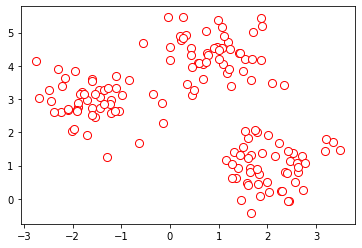

In [1]:
import numpy as np;import pandas as pd;
from sklearn.datasets import make_blobs;import matplotlib.pyplot as plt;import seaborn as sns
X,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.6,shuffle=True,random_state=0)
plt.scatter(X[:,0],X[:,1],edgecolors='red',s=65,color='white')

##### Gráfica con tres cluster aprecidados a simple vista

In [2]:
from sklearn.cluster import KMeans
modelo=KMeans(n_clusters=3,init='random',random_state=0)
y_pred=modelo.fit_predict(X)


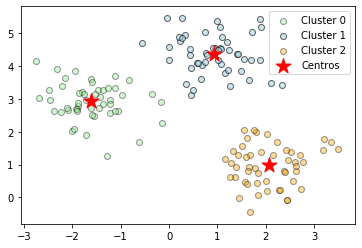

In [3]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='lightgreen',alpha=0.4,edgecolors='black',label='Cluster 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='lightblue',alpha=0.6,edgecolors='black',label='Cluster 1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='orange',alpha=0.4,edgecolors='black',label='Cluster 2')
plt.scatter(modelo.cluster_centers_[:,0],modelo.cluster_centers_[:,1],marker='*',s=250,color='red',label='Centros')
plt.legend()

##### La principal desventaja del modelo K-Means es que de antemano se debe fijar el número de cluster, información que apriori se no es imposible de obtener

# Una forma más lista de inicializar el centroide de los clusters con K-Means++


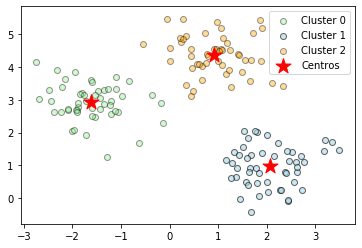

In [4]:
modelo=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_pred=modelo.fit_predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='lightgreen',alpha=0.4,edgecolors='black',label='Cluster 0')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='lightblue',alpha=0.6,edgecolors='black',label='Cluster 1')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],color='orange',alpha=0.4,edgecolors='black',label='Cluster 2')
plt.scatter(modelo.cluster_centers_[:,0],modelo.cluster_centers_[:,1],marker='*',s=250,color='red',label='Centros')
plt.legend()

## The elbow method to find the optimal number of clusters

Text(0, 0.5, 'SSE')

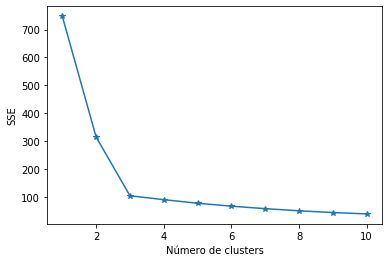

In [5]:
elbow=[]

for i in range(1,11):
    modelo=KMeans(n_clusters=i,init='k-means++',random_state=0)
    modelo.fit(X)
    elbow.append(modelo.inertia_)
    
plt.plot(range(1,11),elbow,marker='*')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
    

##### Como se puede observar en la gráfica el codo se situa en 3, indicando el número óptimo de cluster con el cual se debe inicializar el parametro n_clusters en el modelo K-Means para obtener el mejor rendimiento.

# Quantifying the quality of clustering via silhouette plots

In [6]:
from sklearn.metrics import silhouette_score;from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=0,tol=1e-04)
y_pred=km.fit_predict(X)



Text(0.5, 0, 'Silhouette coefficient')

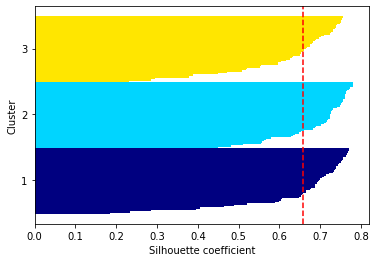

In [7]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_pred)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_pred, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

##### Como la media del coeficiente de Silhouette (indicado por la linea vertical roja) no es ni cercano a cero es buen indicio de buen clustering. Los tres clusters indicados en la figura tienen aproximandamente la misma longitud y el mismo grosor. Este es el objetivo buscado al aplicar unsupervised learning models

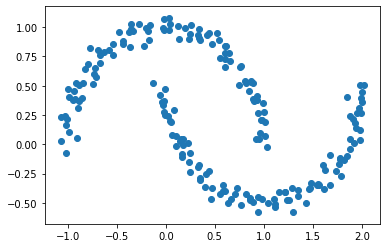

In [10]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])


#### En la gráfica anterior se muestra un conjunto de datos los cuales se agrupan en forma no esférica, por lo tanto el uso del algoritmo K-Means en este caso es extremadamente propenso a producir malos resultados

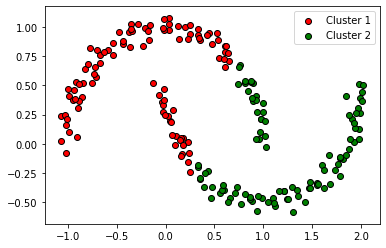

In [14]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=2,random_state=0)
km.fit(X)
y_pred=km.predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='red',label='Cluster 1',edgecolors='black')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='green',label='Cluster 2',edgecolors='black')
plt.legend()

##### Como ya se había dicho el algoritmo K-Means es incapaz de separar los dos cluster de manera apropiada.

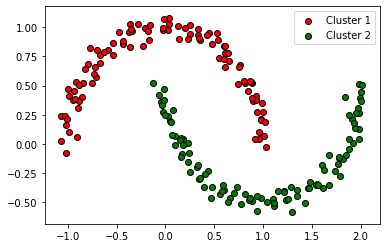

In [16]:
from sklearn.cluster import DBSCAN
modelo=DBSCAN(eps=0.2,metric='euclidean')
y_pred=modelo.fit_predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],color='red',label='Cluster 1',edgecolors='black')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],color='green',label='Cluster 2',edgecolors='black')
plt.legend()

##### A diferencia de K-Means,  el algoritmo DBSCAN es cápaz de separar perfectamente ambos cluster, sin necesidad previa de indicar el número de cluster como es el caso con K-Means. Todos los algoritmos de clustering sufren de la maldición de la dimensionalidad, por lo que es siempre recomendable intentar aplicar algoritmos no supervisados de reducción de dimensionalidad como PCA o RBF kernel PCA.